In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [4]:
file = pd.read_csv('TV_dataset_202511060849.csv', delimiter=';')

C:\Users\karlo\AppData\Local\Temp\ipykernel_7780\1169298260.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('TV_dataset_202511060849.csv', delimiter=';')


In [5]:
file.head()

,ID_STANA,OBRACUN_ID,OBRADA_ID,BR_OBR_PER,ID_POTROS,POVRSINA,BR_OSOBA,DN_PRIM_V,MODEL_EG,MODEL_TV,...,UISRS3SG,UENESTV,DATUM_OD,DATUM,OBRACUNATO_DANA,SNASUC,SNASTV,ENESGR,ENESTV,ENESZP
0,424110070302,110022117043,110232521911,201010,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.006224,NaN,1.112,NaN,NaN
1,424110070345,110022117043,110232521911,201010,42411007,30.81,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.003535,NaN,0.632,NaN,NaN
2,424110070353,110022117043,110232521911,201010,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.006224,NaN,1.113,NaN,NaN
3,424110070370,110022117043,110232521911,201010,42411007,30.81,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.003535,NaN,0.632,NaN,NaN
4,424110070388,110022117043,110232521911,201010,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.006224,NaN,1.113,NaN,NaN


In [32]:
file[file['ID_STANA'] == 424110070302]

,ID_STANA,OBRACUN_ID,OBRADA_ID,BR_OBR_PER,ID_POTROS,POVRSINA,BR_OSOBA,DN_PRIM_V,MODEL_EG,MODEL_TV,...,UISRS3SG,UENESTV,DATUM_OD,DATUM,OBRACUNATO_DANA,SNASUC,SNASTV,ENESGR,ENESTV,ENESZP
0,424110070302,110022117043,110232521911,201010,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-09-28 00:00:00.000,2010-10-27 00:00:00.000,31,0.006224,NaN,1.112,NaN,NaN
106866,424110070302,110023386814,110233780921,201011,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-10-27 00:00:00.000,2010-11-29 00:00:00.000,30,0.006224,NaN,1.441,NaN,NaN
215691,424110070302,110024639389,110235030295,201012,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-11-29 00:00:00.000,2010-12-28 00:00:00.000,31,0.006224,NaN,1.927,NaN,NaN
319892,424110070302,110025992628,110236381385,201101,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2010-12-28 00:00:00.000,2011-01-28 00:00:00.000,31,0.006224,NaN,2.190,NaN,NaN
429940,424110070302,110027263731,110237666306,201102,42411007,54.25,0.0,A,2EG,NaN,...,NaN,NaN,2011-01-28 00:00:00.000,2011-02-28 00:00:00.000,28,0.006224,NaN,2.129,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19503862,424110070302,110309243636,110520105061,202504,42411007,54.25,1.0,A,2EG,2EV,...,NaN,NaN,2025-03-31 00:00:00.000,2025-04-30 00:00:00.000,30,0.006267,NaN,0.651,0.121,NaN
19613424,424110070302,110311898224,110522749941,202505,42411007,54.25,1.0,A,2EG,2EV,...,NaN,NaN,2025-04-30 00:00:00.000,2025-05-31 00:00:00.000,31,0.006267,NaN,0.323,0.128,NaN
19771586,424110070302,110314203010,110525037127,202506,42411007,54.25,1.0,A,2EG,2EV,...,NaN,NaN,2025-05-31 00:00:00.000,2025-06-30 00:00:00.000,30,0.006267,NaN,NaN,0.131,NaN
19946614,424110070302,110316467845,110527301418,202507,42411007,54.25,1.0,A,2EG,2EV,...,NaN,NaN,2025-06-30 00:00:00.000,2025-07-31 00:00:00.000,31,0.006267,NaN,NaN,0.120,NaN


In [7]:
print(file.dtypes)

ID_STANA              int64
OBRACUN_ID            int64
OBRADA_ID             int64
BR_OBR_PER            int64
ID_POTROS             int64
POVRSINA            float64
BR_OSOBA            float64
DN_PRIM_V            object
MODEL_EG             object
MODEL_TV             object
CB_RASPODJELA_TV      int64
S_SNAGA             float64
POVRSINA_EG         float64
SNAGA_EG            float64
MENSGR              float64
MVOSTV              float64
BR_IMP              float64
USNAS1EG            float64
UPOVS2S             float64
UPSTS2S             float64
UPBRS2EG            float64
UPSRS3EG            float64
UISRS3EG            float64
USSRS3SG            float64
UISRS3SG            float64
UENESTV             float64
DATUM_OD             object
DATUM                object
OBRACUNATO_DANA       int64
SNASUC              float64
SNASTV              float64
ENESGR              float64
ENESTV              float64
ENESZP              float64
dtype: object


In [11]:
print(file.iloc[:, 8].unique())

['2EG' nan '3EG' '1EG' '3SG']


In [16]:
print(file.columns[(file.isnull().sum() / len(file) * 100) == 100])

Index(['SNASTV'], dtype='object')


Može se potpuno izbaciti sve vrijednosti su NULL.

In [31]:
file = file.drop("SNASTV", axis=1)

In [32]:
(file.isnull().sum() / len(file) * 100)

ID_STANA             0.000000
OBRACUN_ID           0.000000
OBRADA_ID            0.000000
BR_OBR_PER           0.000000
ID_POTROS            0.000000
POVRSINA             2.200986
BR_OSOBA            33.018563
DN_PRIM_V            4.393863
MODEL_EG             7.833690
MODEL_TV            51.414523
CB_RASPODJELA_TV     0.000000
S_SNAGA             93.226127
POVRSINA_EG          1.470961
SNAGA_EG            28.013002
MENSGR              92.171037
MVOSTV              97.985181
BR_IMP              61.987527
USNAS1EG            98.741994
UPOVS2S             71.942108
UPSTS2S             82.554613
UPBRS2EG            73.860211
UPSRS3EG            99.212874
UISRS3EG            99.386049
USSRS3SG            99.992527
UISRS3SG            99.994874
UENESTV             82.869564
DATUM_OD             0.000000
DATUM                0.002227
OBRACUNATO_DANA      0.000000
SNASUC               0.008509
ENESGR              22.726265
ENESTV              25.952904
ENESZP              95.931994
GODINA    

In [22]:
count_gt = (file["ID_STANA"] > 4000000).sum()
print(count_gt)
count_not_gt = (file["ID_STANA"] <= 4000000).sum()
print(count_not_gt)
print(len(file))

20073272
0
20073272


Prema opisu:
id_stana - to je primary key za stan - ako je > 4000000 onda su to privatni stanovi, ako je manji onda su to firme I obrti, znači da su u datasetu samo privatni stanovi

Upoznavanje sa značajkama.

In [23]:
file['POVRSINA'].unique()

array([ 54.25,  30.81,  38.29, ..., 136.53, 127.46, 315.52])

In [25]:
file['BR_OSOBA'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.,  5.,  6., 11.,  7.,  8., 81., 50.,
       85., 71., 55.,  9., 12., 18., 15., 10., 13., 20., 14., 30., 47.])

In [26]:
file['BR_OBR_PER'].unique()

array([201010, 201011, 201012, 201101, 201102, 201103, 201104, 201105,
       201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201,
       201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209,
       201210, 201211, 201212, 201301, 201302, 201303, 201305, 201304,
       201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401,
       201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409,
       201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505,
       201506, 201507, 201508, 201509, 201511, 201510, 201512, 201601,
       201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609,
       201610, 201611, 201701, 201612, 201702, 201703, 201704, 201706,
       201705, 201707, 201708, 201710, 201709, 201711, 201712, 201801,
       201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809,
       201810, 201811, 201812, 201901, 201902, 201903, 201904, 201907,
       201905, 201906, 201908, 201909, 201910, 202001, 201912, 201911,
      

In [28]:
file['OBRADA_ID'].unique()

array([110232521911, 110233887603, 110233887587, ..., 110530962279,
       110530962679, 110530968348])

In [29]:
file['OBRACUN_ID'].unique()

array([110022117043, 110022618518, 110022618537, ..., 110320951835,
       110320952200, 110320957084])

In [6]:
file['GODINA'] = file['BR_OBR_PER'] // 100
file['MJESEC'] = file['BR_OBR_PER'] % 100

In [7]:
print(file['GODINA'].unique())
print(file['MJESEC'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]
[10 11 12  1  2  3  4  5  6  7  8  9]


Zbog treniranja potrebno staviti mjesece u trigonometrijsku notaciju.
Prema literaturi: https://publications.rwth-aachen.de/record/984188/files/984188.pdf str.45.

In [8]:
file['MJESEC_sin'] = np.sin(2 * np.pi * file['MJESEC'] / 12)
file['MJESEC_cos'] = np.cos(2 * np.pi * file['MJESEC'] / 12)

In [9]:
print(file['MJESEC_sin'].unique())
print(file['MJESEC_cos'].unique())

[-8.66025404e-01 -5.00000000e-01 -2.44929360e-16  5.00000000e-01
  8.66025404e-01  1.00000000e+00  8.66025404e-01  1.22464680e-16
 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00]
[ 5.00000000e-01  8.66025404e-01  1.00000000e+00  8.66025404e-01
  6.12323400e-17 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00
 -8.66025404e-01 -5.00000000e-01 -1.83697020e-16]


Treniranja s početne 3 značajke.

In [10]:
features = ['POVRSINA', 'BR_OSOBA', 'MJESEC_sin', 'MJESEC_cos']
X = file[features].dropna()
X.head()

,POVRSINA,BR_OSOBA,MJESEC_sin,MJESEC_cos
0,54.25,0.0,-0.866025,0.5
1,30.81,0.0,-0.866025,0.5
2,54.25,0.0,-0.866025,0.5
3,30.81,0.0,-0.866025,0.5
4,54.25,0.0,-0.866025,0.5


In [11]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

print(X_scaled.head())

   POVRSINA  BR_OSOBA  MJESEC_sin  MJESEC_cos
0  0.035753 -0.613315   -1.247425    0.689492
1 -1.219509 -0.613315   -1.247425    0.689492
2  0.035753 -0.613315   -1.247425    0.689492
3 -1.219509 -0.613315   -1.247425    0.689492
4  0.035753 -0.613315   -1.247425    0.689492


Metode za optimalni k, prema literaturi: https://www.fer.unizg.hr/predmet/struce1

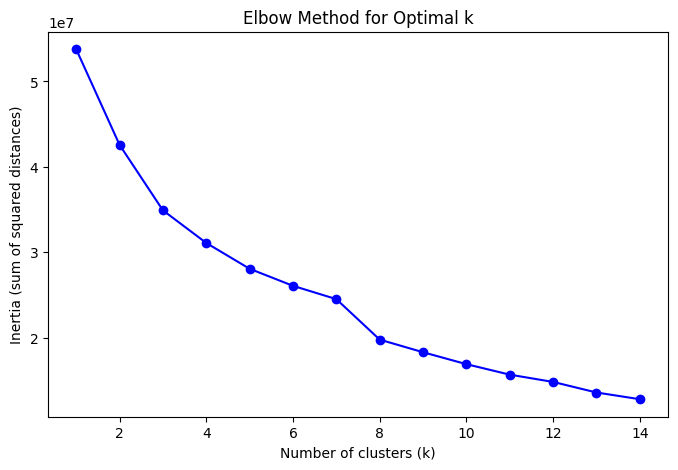

In [ ]:
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

Dodatna provjera optimalnog k:

In [33]:
sample_indices = X_scaled.sample(10000, random_state=42).index
X_sample = X_scaled.loc[sample_indices]

for k in [3,4, 5, 6]:
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42,
        n_init=10
    )
    
    labels = kmeans.fit_predict(X_scaled)

    labels_sample = pd.Series(labels, index=X_scaled.index).loc[sample_indices]

    score = silhouette_score(X_sample, labels_sample)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=3: 0.2654
Silhouette Score for k=4: 0.2664
Silhouette Score for k=5: 0.2648
Silhouette Score for k=6: 0.2450


In [34]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

file.loc[X.index, 'cluster'] = labels
X_scaled['cluster'] = labels

In [35]:
print(file['cluster'].value_counts())

cluster
1.0    4079684
3.0    3911224
2.0    3864181
0.0    1590103
Name: count, dtype: int64


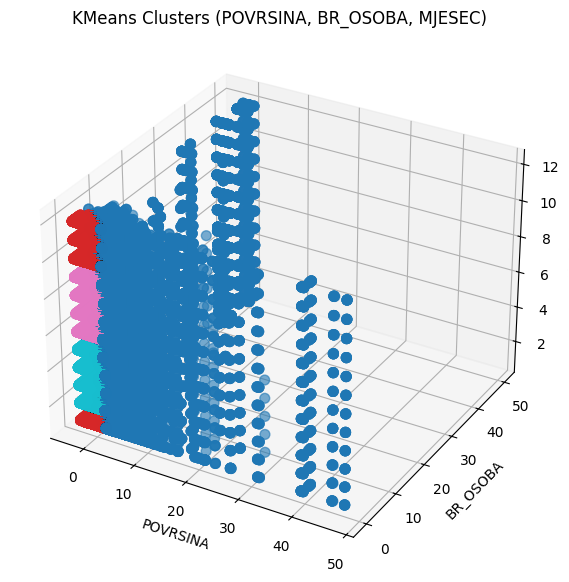

In [ ]:
month_plot = file.loc[X_scaled.index, 'MJESEC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_scaled['POVRSINA'], 
    X_scaled['BR_OSOBA'], 
    month_plot,
    c=X_scaled['cluster'], 
    cmap='tab10', 
    s=50,
    alpha=0.6
)

ax.set_xlabel('POVRSINA')
ax.set_ylabel('BR_OSOBA')
ax.set_zlabel('MJESEC')
ax.set_title('KMeans Clusters (POVRSINA, BR_OSOBA, MJESEC)')
plt.show()

In [37]:
file.loc[X_scaled.index, 'cluster'] = X_scaled['cluster']

columns_to_analyze = ['POVRSINA', 'BR_OSOBA', 'MJESEC']

grouped = file.groupby('cluster')[columns_to_analyze]

means = grouped.mean()
print("Prosječne vrijednosti po clusterima:")
print(means)

stds = grouped.std()
print("\nStandardna devijacija po clusterima:")
print(stds)

Prosječne vrijednosti po clusterima:
          POVRSINA  BR_OSOBA    MJESEC
cluster                               
0.0      75.871978  3.313789  6.085320
1.0      50.792770  0.689128  8.659869
2.0      50.667947  0.757762  7.476577
3.0      50.309680  0.713714  3.499379

Standardna devijacija po clusterima:
          POVRSINA  BR_OSOBA    MJESEC
cluster                               
0.0      26.701739  3.311271  3.446196
1.0      15.106272  0.947965  4.325386
2.0      14.994172  0.971902  1.105702
3.0      14.814137  0.940676  1.108860


In [38]:
file.loc[X_scaled.index, 'cluster'] = X_scaled['cluster']

columns_to_analyze = ['ENESGR', 'ENESTV', 'ENESZP']

grouped = file.groupby('cluster')[columns_to_analyze]

means = grouped.mean()
print("Prosječne vrijednosti po clusterima:")
print(means)

stds = grouped.std()
print("\nStandardna devijacija po clusterima:")
print(stds)

Prosječne vrijednosti po clusterima:
           ENESGR    ENESTV    ENESZP
cluster                              
0.0      1.116156  0.361867  0.150855
1.0      1.077269  0.152641  0.153994
2.0      0.188288  0.141524       NaN
3.0      0.773099  0.148310  0.071088

Standardna devijacija po clusterima:
           ENESGR    ENESTV    ENESZP
cluster                              
0.0      1.009550  0.173461  0.218618
1.0      0.673381  0.123638  0.154985
2.0      0.115915  0.109303       NaN
3.0      0.616551  0.117887  0.112785


In [85]:
print(file.columns)

Index(['ID_STANA', 'OBRACUN_ID', 'OBRADA_ID', 'BR_OBR_PER', 'ID_POTROS',
       'POVRSINA', 'BR_OSOBA', 'DN_PRIM_V', 'MODEL_EG', 'MODEL_TV',
       'CB_RASPODJELA_TV', 'S_SNAGA', 'POVRSINA_EG', 'SNAGA_EG', 'MENSGR',
       'MVOSTV', 'BR_IMP', 'USNAS1EG', 'UPOVS2S', 'UPSTS2S', 'UPBRS2EG',
       'UPSRS3EG', 'UISRS3EG', 'USSRS3SG', 'UISRS3SG', 'UENESTV', 'DATUM_OD',
       'DATUM', 'OBRACUNATO_DANA', 'SNASUC', 'SNASTV', 'ENESGR', 'ENESTV',
       'ENESZP', 'GODINA', 'MJESEC', 'MJESEC_sin', 'MJESEC_cos', 'cluster'],
      dtype='object')


In [86]:
new_features = ["UPOVS2S","UPSTS2S","UPBRS2EG",
                "UPSRS3EG","UISRS3EG","USSRS3SG","UISRS3SG"]

null_percent = (file[new_features].isnull().sum() / len(file) * 100)

non_null_count = file[new_features].notnull().sum()

null_stats = pd.DataFrame({
    "Non-Null Count": non_null_count,
    "NaN Percent": null_percent
})

print(null_stats)
print(len(file))

          Non-Null Count  NaN Percent
UPOVS2S          5632137    71.942108
UPSTS2S          3501860    82.554613
UPBRS2EG         5247111    73.860211
UPSRS3EG          158002    99.212874
UISRS3EG          123240    99.386049
USSRS3SG            1500    99.992527
UISRS3SG            1029    99.994874
20073272


UPBRS1EG         - ukupna suma povrsina_eg svih stanova koji se nalaze na istom potrosacu, te imaju model_eg = 1EG  - ne postoji u tablici

In [ ]:
agg_features = ["UPOVS2S","UPSTS2S","UPBRS2EG",
                "UPSRS3EG","UISRS3EG","USSRS3SG","UISRS3SG"]

agg_tables = {}

for col in agg_features:
    agg_tables[col] = file[file[col].notnull()][agg_features].head(50)
    print(f"\n--- Tablica za {col} (prvih 50 redaka gdje {col} nije NaN) ---")
    print(agg_tables[col])



--- Tablica za UPOVS2S (prvih 50 redaka gdje UPOVS2S nije NaN) ---
     UPOVS2S  UPSTS2S  UPBRS2EG  UPSRS3EG  UISRS3EG  USSRS3SG  UISRS3SG
0   0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
1   0.003504      NaN  0.003504       NaN       NaN       NaN       NaN
2   0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
3   0.003504      NaN  0.003504       NaN       NaN       NaN       NaN
4   0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
5   0.003504      NaN  0.003504       NaN       NaN       NaN       NaN
6   0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
7   0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
8   0.004354      NaN  0.004354       NaN       NaN       NaN       NaN
9   0.003504      NaN  0.003504       NaN       NaN       NaN       NaN
10  0.006169      NaN  0.006169       NaN       NaN       NaN       NaN
11  0.003504      NaN  0.003504       NaN       NaN       NaN       

Prve dvije kolone provjera jesu li jednake.

Provjera za 2EG vrijednosti i 3EG vrijednosti jesu li uvijek jednake početnoj UPOVS2S.

In [ ]:
base = "UPOVS2S"
compare_with = ["UPSTS2S", "UPBRS2EG", "UPSRS3EG"]

for col in compare_with:
    print(f"\n===========================")
    print(f"USPORDI: {base}  vs  {col}")
    print("===========================")

    null_problem = file[file[base].isnull() & file[col].notnull()]
    print(f"1) {base} je NULL, ali {col} NIJE NULL → {len(null_problem)} redaka")

    mismatch = file[
        file[base].notnull() &
        file[col].notnull() &
        (file[base] != file[col])
    ]
    print(f"2) Vrijednosti postoje, ali se razlikuju → {len(mismatch)} redaka")


USPORDI: UPOVS2S  vs  UPSTS2S
1) UPOVS2S je NULL, ali UPSTS2S NIJE NULL → 0 redaka
2) Vrijednosti postoje, ali se razlikuju → 18970 redaka

USPORDI: UPOVS2S  vs  UPBRS2EG
1) UPOVS2S je NULL, ali UPBRS2EG NIJE NULL → 570 redaka
2) Vrijednosti postoje, ali se razlikuju → 30184 redaka

USPORDI: UPOVS2S  vs  UPSRS3EG
1) UPOVS2S je NULL, ali UPSRS3EG NIJE NULL → 1672 redaka
2) Vrijednosti postoje, ali se razlikuju → 129133 redaka


Provjeriti zašto su nekada različiti. Vidjeti i s njima.

In [14]:
features = ['POVRSINA', 'BR_OSOBA', 'MJESEC_sin', 'MJESEC_cos', 'UPBRS2EG']
X_2EG = file[features].dropna()
X_2EG.head()

,POVRSINA,BR_OSOBA,MJESEC_sin,MJESEC_cos,UPBRS2EG
0,54.25,0.0,-0.866025,0.5,0.006169
1,30.81,0.0,-0.866025,0.5,0.003504
2,54.25,0.0,-0.866025,0.5,0.006169
3,30.81,0.0,-0.866025,0.5,0.003504
4,54.25,0.0,-0.866025,0.5,0.006169


In [15]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_2EG)

X_2EGscaled = pd.DataFrame(X_scaled_array, columns=X_2EG.columns, index=X_2EG.index)

print(X_2EGscaled.head())

   POVRSINA  BR_OSOBA  MJESEC_sin  MJESEC_cos  UPBRS2EG
0  0.031873 -0.063539   -1.255427     0.59328 -0.192929
1 -1.200182 -0.063539   -1.255427     0.59328 -0.257121
2  0.031873 -0.063539   -1.255427     0.59328 -0.192929
3 -1.200182 -0.063539   -1.255427     0.59328 -0.257121
4  0.031873 -0.063539   -1.255427     0.59328 -0.192929


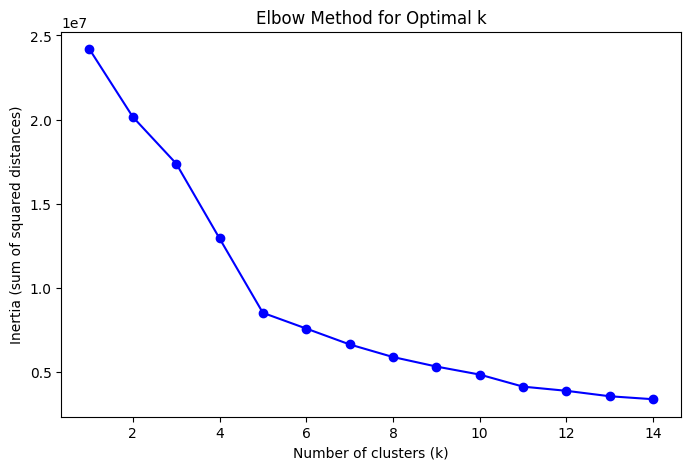

In [ ]:
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2EGscaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
sample_indices = X_2EGscaled.sample(10000, random_state=42).index
X_sample = X_2EGscaled.loc[sample_indices]

for k in [4, 5, 6]:
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42,
        n_init=10
    )
    
    labels = kmeans.fit_predict(X_2EGscaled)

    labels_sample = pd.Series(labels, index=X_2EGscaled.index).loc[sample_indices]

    score = silhouette_score(X_sample, labels_sample)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=4: 0.2995
Silhouette Score for k=5: 0.3154
Silhouette Score for k=6: 0.3046


In [39]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_2EGscaled)

file.loc[X_2EG.index, 'cluster1'] = labels
X_2EGscaled['cluster'] = labels


In [41]:
print(file['cluster1'].value_counts())

cluster1
1.0    1754202
4.0    1649571
0.0    1422281
2.0       7896
3.0       2713
Name: count, dtype: int64


In [ ]:
file.loc[X_2EGscaled.index, 'cluster'] = X_2EGscaled['cluster']

columns_to_analyze = ['ENESGR', 'ENESTV', 'ENESZP']

grouped = file.groupby('cluster')[columns_to_analyze]

means = grouped.mean()
print("Prosječne vrijednosti po clusterima:")
print(means)

stds = grouped.std()
print("\nStandardna devijacija po clusterima:")
print(stds)

Prosječne vrijednosti po clusterima:
           ENESGR    ENESTV  ENESZP
cluster                            
0.0      0.251573  0.012038     NaN
1.0      1.453336  0.061841     NaN
2.0      0.973381  0.075929     NaN
3.0      1.841016  0.320420     NaN
4.0      0.951275  0.022347     NaN

Standardna devijacija po clusterima:
           ENESGR    ENESTV  ENESZP
cluster                            
0.0      0.166032  0.056759     NaN
1.0      0.701085  0.121144     NaN
2.0      0.684771  0.126420     NaN
3.0      3.203850  0.392849     NaN
4.0      0.750236  0.078582     NaN


In [21]:
features = ['POVRSINA', 'BR_OSOBA', 'MJESEC_sin', 'MJESEC_cos', 'UPSRS3EG','UISRS3EG']
X_3EG = file[features].dropna()
X_3EG.head()

,POVRSINA,BR_OSOBA,MJESEC_sin,MJESEC_cos,UPSRS3EG,UISRS3EG
8183,54.36,0.0,-0.866025,0.5,0.033360,0.004730
8184,54.36,0.0,-0.866025,0.5,0.033360,0.039479
8185,54.36,0.0,-0.866025,0.5,0.033360,0.001110
8186,52.21,0.0,-0.866025,0.5,0.032041,0.030252
8187,54.36,0.0,-0.866025,0.5,0.033360,0.010979


In [22]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_3EG)

X_3EGscaled = pd.DataFrame(X_scaled_array, columns=X_3EG.columns, index=X_3EG.index)

print(X_3EGscaled.head())

      POVRSINA  BR_OSOBA  MJESEC_sin  MJESEC_cos  UPSRS3EG  UISRS3EG
8183  0.156865 -0.794692   -1.866853    -0.17038  0.707148 -0.381344
8184  0.156865 -0.794692   -1.866853    -0.17038  0.707148  0.823749
8185  0.156865 -0.794692   -1.866853    -0.17038  0.707148 -0.506917
8186  0.026476 -0.794692   -1.866853    -0.17038  0.654205  0.503741
8187  0.156865 -0.794692   -1.866853    -0.17038  0.707148 -0.164630


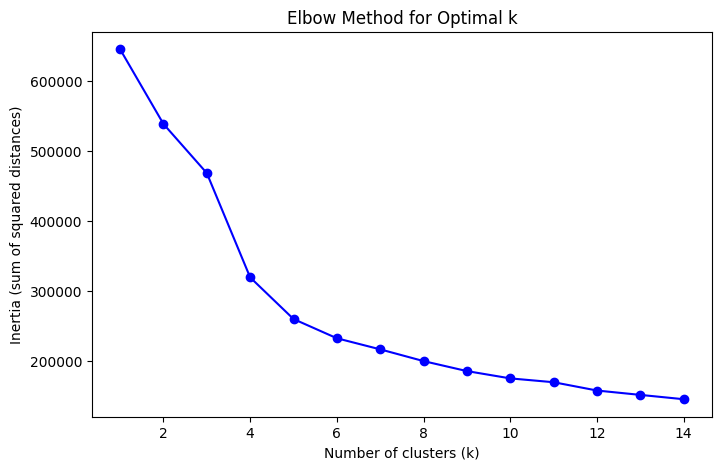

In [ ]:
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_3EGscaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
sample_indices = X_3EGscaled.sample(10000, random_state=42).index
X_sample = X_3EGscaled.loc[sample_indices]

for k in [3, 4, 5, 6]:
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42,
        n_init=10
    )
    
    labels = kmeans.fit_predict(X_3EGscaled)

    labels_sample = pd.Series(labels, index=X_3EGscaled.index).loc[sample_indices]

    score = silhouette_score(X_sample, labels_sample)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=3: 0.2697
Silhouette Score for k=4: 0.2682
Silhouette Score for k=5: 0.2431
Silhouette Score for k=6: 0.2438


In [27]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_3EGscaled)

file.loc[X_3EG.index, 'cluster2'] = labels
X_3EGscaled['cluster'] = labels

In [28]:
print(file['cluster2'].value_counts())

cluster2
1.0    68899
0.0    38677
2.0       55
Name: count, dtype: int64


In [ ]:
file.loc[X_3EGscaled.index, 'cluster2'] = X_3EGscaled['cluster']

columns_to_analyze = ['ENESGR', 'ENESTV', 'ENESZP']

grouped = file.groupby('cluster2')[columns_to_analyze]

means = grouped.mean()
print("Prosječne vrijednosti po clusterima:")
print(means)

stds = grouped.std()
print("\nStandardna devijacija po clusterima:")
print(stds)

Prosječne vrijednosti po clusterima:
            ENESGR    ENESTV  ENESZP
cluster2                            
0.0       0.789050  0.188900     NaN
1.0       0.876076  0.210498     NaN
2.0       0.821618  0.272872     NaN

Standardna devijacija po clusterima:
            ENESGR    ENESTV  ENESZP
cluster2                            
0.0       0.641322  0.182632     NaN
1.0       0.636727  0.171508     NaN
2.0       0.906507  0.175058     NaN


Outlier traženje
1. Udaljenost od centroida
2. IQR metoda
3. Z-score
4. 1% najdaljih